# Final Matrix Tests

In [1]:
import numpy as np
import PIL
import csv

In [2]:
import csv
with open('../csv/matrix.csv') as f:
    matrix_dict = csv.DictReader(f)
    for cspace in matrix_dict:
        # Our destination matrix for computers will be sRGB
        if cspace['col_id'] == 'sRGB':
            XYZ_to_sRGB = np.array([float(cspace['Mdst0']), float(cspace['Mdst1']), float(cspace['Mdst2']),
                                    float(cspace['Mdst3']), float(cspace['Mdst4']), float(cspace['Mdst5']),
                                    float(cspace['Mdst6']), float(cspace['Mdst7']), float(cspace['Mdst8'])])
            XYZ_to_sRGB = np.reshape(XYZ_to_sRGB, (3,3))
        # Source matrices only from here
        elif cspace['col_id'] == 'ARIBTRB9v1':
            ARIBTRB9v1_to_XYZ = np.array([float(cspace['Msrc0']), float(cspace['Msrc1']), float(cspace['Msrc2']),
                                          float(cspace['Msrc3']), float(cspace['Msrc4']), float(cspace['Msrc5']),
                                          float(cspace['Msrc6']), float(cspace['Msrc7']), float(cspace['Msrc8'])])
            ARIBTRB9v1_to_XYZ = np.reshape(ARIBTRB9v1_to_XYZ, (3,3))
        elif cspace['col_id'] == 'sRGB_D93':
            sRGB_D93_to_XYZ = np.array([float(cspace['Msrc0']), float(cspace['Msrc1']), float(cspace['Msrc2']),
                                        float(cspace['Msrc3']), float(cspace['Msrc4']), float(cspace['Msrc5']),
                                        float(cspace['Msrc6']), float(cspace['Msrc7']), float(cspace['Msrc8'])])
            sRGB_D93_to_XYZ = np.reshape(sRGB_D93_to_XYZ, (3,3))
        elif cspace['col_id'] == 'Raney_PVM_20M2U':
            Raney_PVM_20M2U_to_XYZ = np.array([float(cspace['Msrc0']), float(cspace['Msrc1']), float(cspace['Msrc2']),
                                               float(cspace['Msrc3']), float(cspace['Msrc4']), float(cspace['Msrc5']),
                                               float(cspace['Msrc6']), float(cspace['Msrc7']), float(cspace['Msrc8'])])
            Raney_PVM_20M2U_to_XYZ = np.reshape(Raney_PVM_20M2U_to_XYZ, (3,3))
        elif cspace['col_id'] == 'Raney_PVM_20L2MDU':
            Raney_PVM_20L2MDU_XYZ = np.array([float(cspace['Msrc0']), float(cspace['Msrc1']), float(cspace['Msrc2']),
                                              float(cspace['Msrc3']), float(cspace['Msrc4']), float(cspace['Msrc5']),
                                              float(cspace['Msrc6']), float(cspace['Msrc7']), float(cspace['Msrc8'])])
            Raney_PVM_20L2MDU_XYZ = np.reshape(Raney_PVM_20L2MDU_XYZ, (3,3))




Processing  ref_supermetroid.png ... please be patient... 

Difference images stored in the 'out' folder, not displaying here. 

Reference image:  ref_supermetroid.png


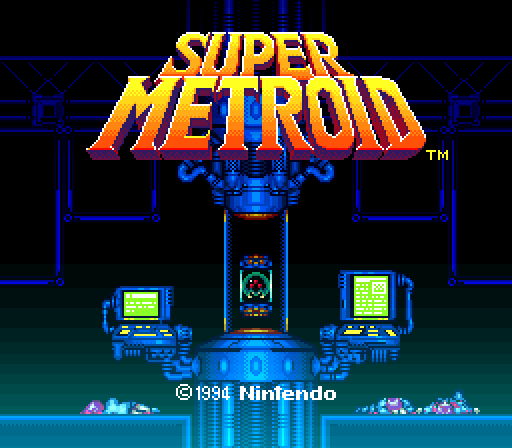

-------------
 Colourspace: ARIBTRB9v1


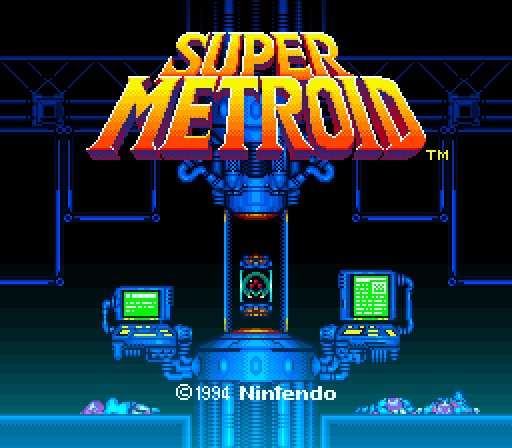

-------------
 Colourspace: sRGB_D93


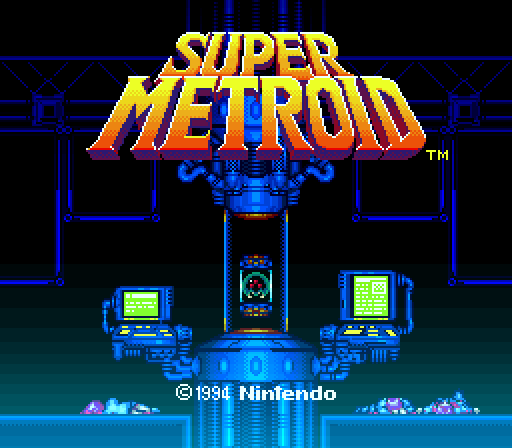

-------------
 Colourspace: Raney_PVM_20M2U


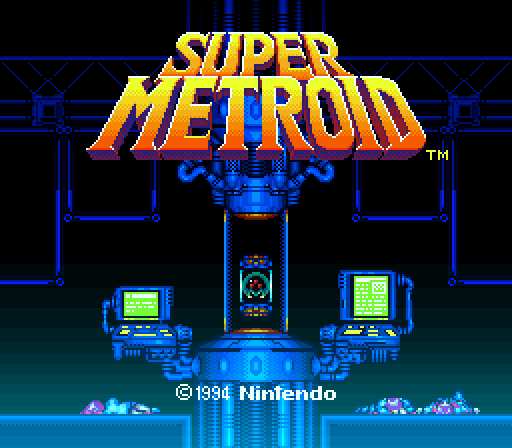

-------------
 Colourspace: Raney_PVM_20L2MDU


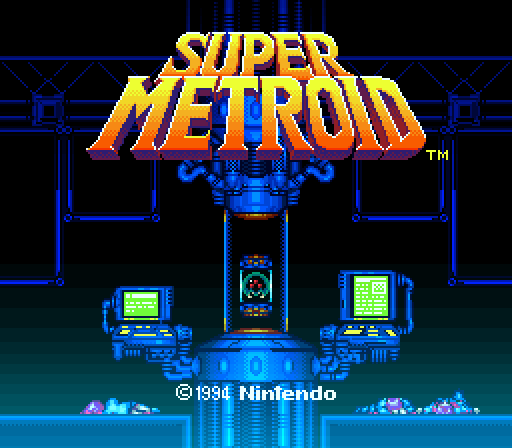

Processing  ref_zelda3.png ... please be patient... 

Difference images stored in the 'out' folder, not displaying here. 

Reference image:  ref_zelda3.png


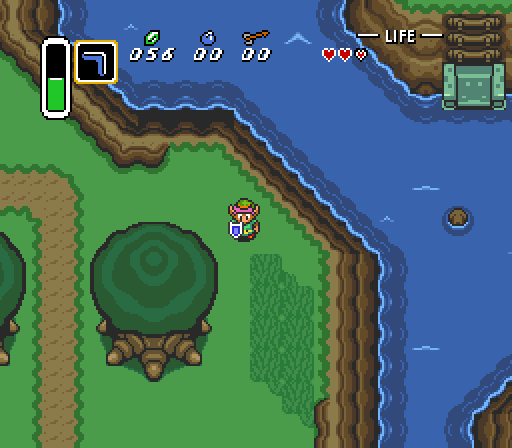

-------------
 Colourspace: ARIBTRB9v1


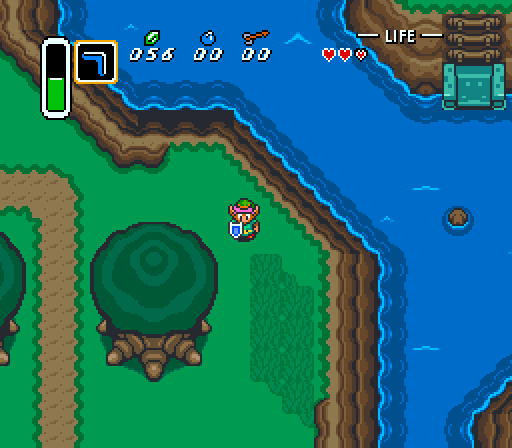

-------------
 Colourspace: sRGB_D93


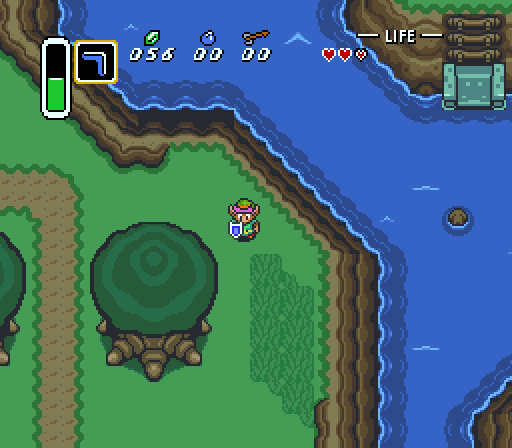

-------------
 Colourspace: Raney_PVM_20M2U


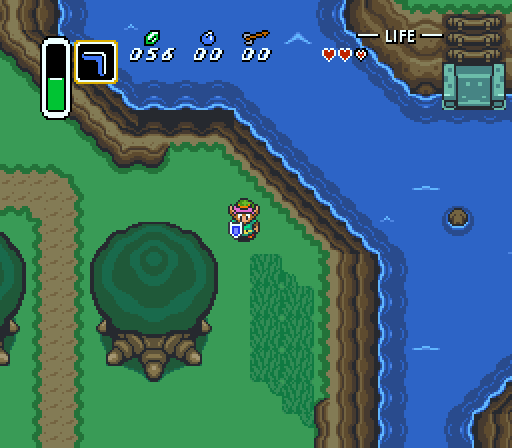

-------------
 Colourspace: Raney_PVM_20L2MDU


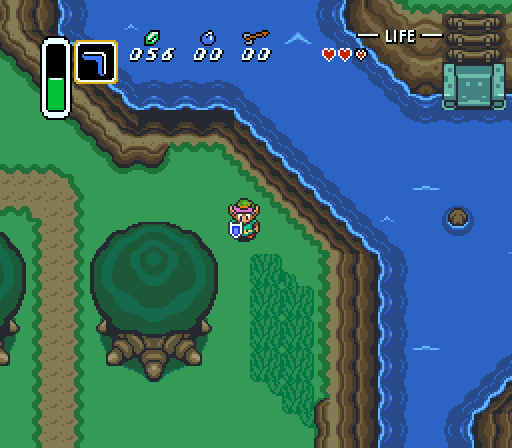

In [3]:
from PIL import Image

for refimage in "ref_supermetroid.png", "ref_zelda3.png":
    print("Processing ", refimage, "... please be patient... \n")
    # read image as array
    in_arr=np.asarray(Image.open(refimage))

    # create empty arrays for conversions
    ARIBTRB9v1_arr = np.empty(in_arr.shape, dtype=in_arr.dtype)
    sRGB_D93_arr = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20M2U_arr = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20L2MDU_arr = np.empty(in_arr.shape, dtype=in_arr.dtype)

    # absolute difference matrix
    # we calculate pixel difference in any direction, compare to black
    # we'll also scale that 10x to see slight differences better
    ARIBTRB9v1_adiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    ARIBTRB9v1_adiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)
    sRGB_D93_adiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    sRGB_D93_adiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20M2U_adiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20M2U_adiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20L2MDU_adiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20L2MDU_adiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)

    # relative pixel difference
    # we calculate pixel difference in positive and negative terms, compare to 8bit grey127
    # we'll also scale that 10x to see slight differences better
    ARIBTRB9v1_rdiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    ARIBTRB9v1_rdiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)
    sRGB_D93_rdiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    sRGB_D93_rdiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20M2U_rdiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20M2U_rdiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20L2MDU_rdiff = np.empty(in_arr.shape, dtype=in_arr.dtype)
    Raney_PVM_20L2MDU_rdiff10 = np.empty(in_arr.shape, dtype=in_arr.dtype)

    # Image array is 3D - (rows, columns, RGB pixel values)
    for in_row in range(in_arr.shape[0]):
        for in_col in range(in_arr.shape[1]):
            # grab pixel which will be D65 sRGB gamma 2.2 uint8
            in_pixel = in_arr[in_row][in_col]

            # convert to float, scale to 0.0 - 1.0
            in_fpixel = in_pixel.astype(float)/255

            # remove gamma to make linear RGB 
            # we're using gamma 2.2, which is a poor approximation
            in_fpixel = in_fpixel**(2.2)

            # convert from linear RGB to XYZ via desired source matrix
            ARIBTRB9v1_pixel = np.matmul(ARIBTRB9v1_to_XYZ, in_fpixel)
            sRGB_D93_pixel = np.matmul(sRGB_D93_to_XYZ, in_fpixel)
            Raney_PVM_20M2U_pixel = np.matmul(Raney_PVM_20M2U_to_XYZ, in_fpixel)
            Raney_PVM_20L2MDU_pixel = np.matmul(Raney_PVM_20L2MDU_XYZ, in_fpixel)

            # convert back to linear RGB, normalised 0.0-1.0, via destination matrix for viewing on an sRGB monitor
            sRGB_ARIBTRB9v1_pixel = np.matmul(XYZ_to_sRGB, ARIBTRB9v1_pixel)
            sRGB_sRGB_D93_pixel = np.matmul(XYZ_to_sRGB, sRGB_D93_pixel)
            sRGB_Raney_PVM_20M2U_pixel = np.matmul(XYZ_to_sRGB, Raney_PVM_20M2U_pixel)
            sRGB_Raney_PVM_20L2MDU_pixel = np.matmul(XYZ_to_sRGB, Raney_PVM_20L2MDU_pixel)

            # clip our RGB pixels in the range 0.0-1.0 to remove any negative values
            sRGB_ARIBTRB9v1_pixel = np.clip(sRGB_ARIBTRB9v1_pixel, 0, 1)
            sRGB_sRGB_D93_pixel = np.clip(sRGB_sRGB_D93_pixel, 0, 1)
            sRGB_Raney_PVM_20M2U_pixel = np.clip(sRGB_Raney_PVM_20M2U_pixel, 0, 1)
            sRGB_Raney_PVM_20L2MDU_pixel = np.clip(sRGB_Raney_PVM_20L2MDU_pixel, 0, 1)

            # pixel is now linear RGB, no gamma. Let's diff it pre-gamma and store the result
            # absolute differences up to black 
            ARIBTRB9v1_adiff[in_row][in_col] = np.clip(np.round(np.abs(sRGB_ARIBTRB9v1_pixel - in_fpixel)*255), 0, 255)
            ARIBTRB9v1_adiff10[in_row][in_col] = np.clip(np.round(np.abs(sRGB_ARIBTRB9v1_pixel - in_fpixel)*255)*10, 0, 255)
            sRGB_D93_adiff[in_row][in_col] = np.clip(np.round(np.abs(sRGB_sRGB_D93_pixel - in_fpixel)*255), 0, 255)
            sRGB_D93_adiff10[in_row][in_col] = np.clip(np.round(np.abs(sRGB_sRGB_D93_pixel - in_fpixel)*255)*10, 0, 255)
            Raney_PVM_20M2U_adiff[in_row][in_col] = np.clip(np.round(np.abs(sRGB_Raney_PVM_20M2U_pixel - in_fpixel)*255), 0, 255)
            Raney_PVM_20M2U_adiff10[in_row][in_col] = np.clip(np.round(np.abs(sRGB_Raney_PVM_20M2U_pixel - in_fpixel)*255)*10, 0, 255)
            Raney_PVM_20L2MDU_adiff[in_row][in_col] = np.clip(np.round(np.abs(sRGB_Raney_PVM_20L2MDU_pixel - in_fpixel)*255), 0, 255)
            Raney_PVM_20L2MDU_adiff10[in_row][in_col] = np.clip(np.round(np.abs(sRGB_Raney_PVM_20L2MDU_pixel - in_fpixel)*255)*10, 0, 255)

            # relative differences positive or negative from grey127
            ARIBTRB9v1_rdiff[in_row][in_col] = np.clip(np.round((sRGB_ARIBTRB9v1_pixel-in_fpixel)*255 + [127,127,127]), 0, 255)
            ARIBTRB9v1_rdiff10[in_row][in_col] = np.clip(np.round((sRGB_ARIBTRB9v1_pixel-in_fpixel)*255*10 + [127,127,127]), 0, 255)
            sRGB_D93_rdiff[in_row][in_col] = np.clip(np.round((sRGB_sRGB_D93_pixel-in_fpixel)*255 + [127,127,127]), 0, 255)
            sRGB_D93_rdiff10[in_row][in_col] = np.clip(np.round((sRGB_sRGB_D93_pixel-in_fpixel)*255*10 + [127,127,127]), 0, 255)
            Raney_PVM_20M2U_rdiff[in_row][in_col] = np.clip(np.round((sRGB_Raney_PVM_20M2U_pixel-in_fpixel)*255 + [127,127,127]), 0, 255)
            Raney_PVM_20M2U_rdiff10[in_row][in_col] = np.clip(np.round((sRGB_Raney_PVM_20M2U_pixel-in_fpixel)*255*10 + [127,127,127]), 0, 255)
            Raney_PVM_20L2MDU_rdiff[in_row][in_col] = np.clip(np.round((sRGB_Raney_PVM_20L2MDU_pixel-in_fpixel)*255 + [127,127,127]), 0, 255)
            Raney_PVM_20L2MDU_rdiff10[in_row][in_col] = np.clip(np.round((sRGB_Raney_PVM_20L2MDU_pixel-in_fpixel)*255*10 + [127,127,127]), 0, 255)
            
            # apply gamma to our linear RGB values
            # again, we're using 2.2 here which is lazy
            sRGB_ARIBTRB9v1_pixel = np.reshape(((sRGB_ARIBTRB9v1_pixel)**(1/2.2)), 3)
            sRGB_sRGB_D93_pixel = np.reshape(((sRGB_sRGB_D93_pixel)**(1/2.2)), 3)
            sRGB_Raney_PVM_20M2U_pixel = np.reshape(((sRGB_Raney_PVM_20M2U_pixel)**(1/2.2)), 3)
            sRGB_Raney_PVM_20L2MDU_pixel = np.reshape(((sRGB_Raney_PVM_20L2MDU_pixel)**(1/2.2)), 3)

            # Scale back up to 8bit 0-255, and clip if over 255 or under 0
            sRGB_ARIBTRB9v1_pixel = np.clip(np.round(sRGB_ARIBTRB9v1_pixel*255), 0, 255)
            sRGB_sRGB_D93_pixel = np.clip(np.round(sRGB_sRGB_D93_pixel*255), 0, 255)
            sRGB_Raney_PVM_20M2U_pixel = np.clip(np.round(sRGB_Raney_PVM_20M2U_pixel*255), 0, 255)
            sRGB_Raney_PVM_20L2MDU_pixel = np.clip(np.round(sRGB_Raney_PVM_20L2MDU_pixel*255), 0, 255)

            # write our final pixels into our arrays
            ARIBTRB9v1_arr[in_row][in_col] = sRGB_ARIBTRB9v1_pixel
            sRGB_D93_arr[in_row][in_col] = sRGB_sRGB_D93_pixel
            Raney_PVM_20M2U_arr[in_row][in_col] = sRGB_Raney_PVM_20M2U_pixel
            Raney_PVM_20L2MDU_arr[in_row][in_col] = sRGB_Raney_PVM_20L2MDU_pixel


    print("Difference images stored in the 'out' folder, not displaying here. \n")
    print("Reference image: ", refimage)
    display(Image.open(refimage))

    print("-------------\n Colourspace: ARIBTRB9v1")
    display(Image.fromarray(ARIBTRB9v1_arr, mode="RGB"))

    print("-------------\n Colourspace: sRGB_D93")
    display(Image.fromarray(sRGB_D93_arr, mode="RGB"))

    print("-------------\n Colourspace: Raney_PVM_20M2U")
    display(Image.fromarray(Raney_PVM_20M2U_arr, mode="RGB"))

    print("-------------\n Colourspace: Raney_PVM_20L2MDU")
    display(Image.fromarray(Raney_PVM_20L2MDU_arr, mode="RGB"))

    # save all images to disk
    Image.fromarray(ARIBTRB9v1_arr).save("out/out_" + refimage + "_ARIBTRB9v1.png", mode="RGB")
    Image.fromarray(sRGB_D93_arr).save("out/out_" + refimage + "_sRGB_D93.png", mode="RGB")
    Image.fromarray(Raney_PVM_20M2U_arr).save("out/out_" + refimage + "_Raney_PVM_20M2U.png", mode="RGB")
    Image.fromarray(Raney_PVM_20L2MDU_arr).save("out/out_" + refimage + "_Raney_PVM_20L2MDU.png", mode="RGB")
          
    Image.fromarray(ARIBTRB9v1_rdiff).save("out/out_" + refimage + "_ARIBTRB9v1_rdiff.png", mode="RGB")
    Image.fromarray(sRGB_D93_rdiff).save("out/out_" + refimage + "_sRGB_D93_rdiff.png", mode="RGB")
    Image.fromarray(Raney_PVM_20M2U_rdiff).save("out/out_" + refimage + "_Raney_PVM_20M2U_rdiff.png", mode="RGB")
    Image.fromarray(Raney_PVM_20L2MDU_rdiff).save("out/out_" + refimage + "_Raney_PVM_20L2MDU_rdiff.png", mode="RGB")

    Image.fromarray(ARIBTRB9v1_rdiff10).save("out/out_" + refimage + "_ARIBTRB9v1_rdiff10.png", mode="RGB")
    Image.fromarray(sRGB_D93_rdiff10).save("out/out_" + refimage + "_sRGB_D93_rdiff10.png", mode="RGB")
    Image.fromarray(Raney_PVM_20M2U_rdiff10).save("out/out_" + refimage + "_Raney_PVM_20M2U_rdiff10.png", mode="RGB")
    Image.fromarray(Raney_PVM_20L2MDU_rdiff10).save("out/out_" + refimage + "_Raney_PVM_20L2MDU_rdiff10.png", mode="RGB")

    Image.fromarray(ARIBTRB9v1_adiff).save("out/out_" + refimage + "_ARIBTRB9v1_adiff.png", mode="RGB")
    Image.fromarray(sRGB_D93_adiff).save("out/out_" + refimage + "_sRGB_D93_adiff.png", mode="RGB")
    Image.fromarray(Raney_PVM_20M2U_adiff).save("out/out_" + refimage + "_Raney_PVM_20M2U_adiff.png", mode="RGB")
    Image.fromarray(Raney_PVM_20L2MDU_adiff).save("out/out_" + refimage + "_Raney_PVM_20L2MDU_adiff.png", mode="RGB")


    Image.fromarray(ARIBTRB9v1_adiff10).save("out/out_" + refimage + "_ARIBTRB9v1_adiff10.png", mode="RGB")
    Image.fromarray(sRGB_D93_adiff10).save("out/out_" + refimage + "_sRGB_D93_adiff10.png", mode="RGB")
    Image.fromarray(Raney_PVM_20M2U_adiff10).save("out/out_" + refimage + "_Raney_PVM_20M2U_adiff10.png", mode="RGB")
    Image.fromarray(Raney_PVM_20L2MDU_adiff10).save("out/out_" + refimage + "_Raney_PVM_20L2MDU_adiff10.png", mode="RGB")
